# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Polynomial Regression model on the Training set

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [5]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.16 431.23]
 [458.26 460.01]
 [460.72 461.14]
 ...
 [469.49 473.26]
 [438.53 438.  ]
 [461.62 463.28]]


## Evaluating and Displaying the Model Performance

In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]   # number of test samples
k = X_test.shape[1]   # number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")

R² Score: 0.9455
Adjusted R² Score: 0.9454


## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

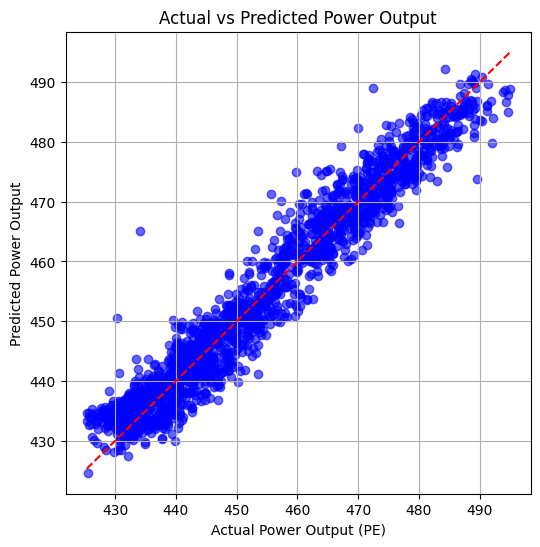

In [7]:
plt.figure(figsize=(10,4))
plt.plot(y_test[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.xlabel('Test Sample Index')
plt.ylabel('Power Output (PE)')
plt.title('Trend Comparison of Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()
